In [1]:
#Install the OpenCV module
#pip install opencv-python

import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

# Exercise 1.1

In [8]:
# Exercise 1

# Import the dataset and ignore comments
runtimes_df = pd.read_csv('runtimes.csv', comment='#')
#print(runtimes_df)

# melt values of timeX into a single column
runtimes_df = pd.melt(runtimes_df,id_vars=['algo','size'],var_name='threads',value_name='runtime')
#print(runtimes_df)

# transform string in 'threads' column 'timeX' -> X as int
runtimes_df['threads'] = runtimes_df['threads'].str.extract(r'time(\d)').astype(int)
#print(runtimes_df)

# clear NAN entries
runtimes_df = runtimes_df.dropna()
print(runtimes_df)


           algo     size  threads      runtime
0   distributed     4096        1     3.736606
1   distributed    16384        1    14.792794
2   distributed    65536        1    59.123347
3   distributed   262144        1   240.747448
4   distributed  1048576        1  1097.788352
5   distributed  4194304        1  4845.007061
6        single     4096        1     3.622693
7        single    16384        1    26.792361
8        single    65536        1   127.812326
9        single   262144        1   281.994783
10  distributed     4096        2     2.133074
11  distributed    16384        2     7.894031
12  distributed    65536        2    30.762486
13  distributed   262144        2   124.448679
14  distributed  1048576        2   567.038172
15  distributed  4194304        2  2501.408669
20  distributed     4096        3     1.673441
21  distributed    16384        3     5.681171
22  distributed    65536        3    21.436608
23  distributed   262144        3    85.384094
24  distribut

# Exercise 1.2

In [3]:
# import the dataset
mpg_df = pd.read_csv("mpg-data.csv")

# inspect the dtypes of the dataset
print(mpg_df.dtypes)
print(mpg_df)

manufacturer     object
model            object
displ           float64
year              int64
cyl               int64
trans            object
drv              object
cty               int64
hwy               int64
fl               object
class            object
dtype: object
    manufacturer   model  displ  year  cyl       trans drv  cty  hwy fl  \
0           audi      a4    1.8  1999    4    auto(l5)   f   18   29  p   
1           audi      a4    1.8  1999    4  manual(m5)   f   21   29  p   
2           audi      a4    2.0  2008    4  manual(m6)   f   20   31  p   
3           audi      a4    2.0  2008    4    auto(av)   f   21   30  p   
4           audi      a4    2.8  1999    6    auto(l5)   f   16   26  p   
..           ...     ...    ...   ...  ...         ...  ..  ...  ... ..   
229   volkswagen  passat    2.0  2008    4    auto(s6)   f   19   28  p   
230   volkswagen  passat    2.0  2008    4  manual(m6)   f   21   29  p   
231   volkswagen  passat    2.8  1999    6    a

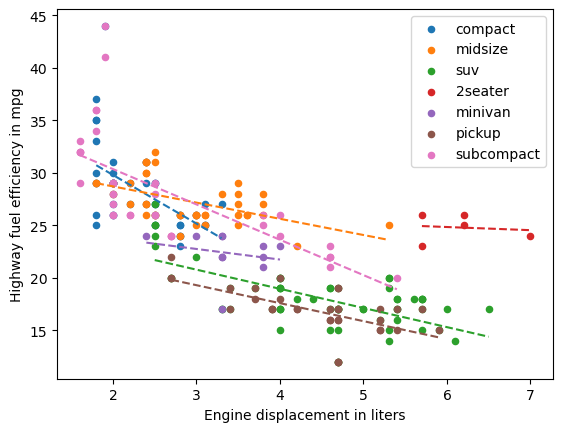

In [4]:
from sklearn.linear_model import LinearRegression

# iterate over different classes and fit linear regression

for car_class in mpg_df["class"].unique():
    class_data = mpg_df[mpg_df["class"] == car_class]
    X = class_data[["displ"]].values
    Y = class_data["hwy"].values
    model = LinearRegression()
    model.fit(X, Y)

    # Scatter Plot
    plt.scatter(X, Y, label = car_class, s = 20)

    # Plot linear regression on the range of X with the same colors
    Xrange = [[X.min()],[X.max()]]
    plt.plot(Xrange, model.predict(Xrange), linestyle="--")

# Plot Labels and legend
plt.legend();
plt.xlabel("Engine displacement in liters")
plt.ylabel("Highway fuel efficiency in mpg")
plt.show()

In [5]:
# Median for class and year

median_hwy_by_class_year = mpg_df.groupby(["class", "year"])["hwy"].median().reset_index()
print(median_hwy_by_class_year)

         class  year   hwy
0      2seater  1999  24.5
1      2seater  2008  25.0
2      compact  1999  26.0
3      compact  2008  29.0
4      midsize  1999  26.0
5      midsize  2008  28.0
6      minivan  1999  22.0
7      minivan  2008  23.0
8       pickup  1999  17.0
9       pickup  2008  17.0
10  subcompact  1999  26.0
11  subcompact  2008  26.5
12         suv  1999  17.0
13         suv  2008  18.0


# Exercise 1.3

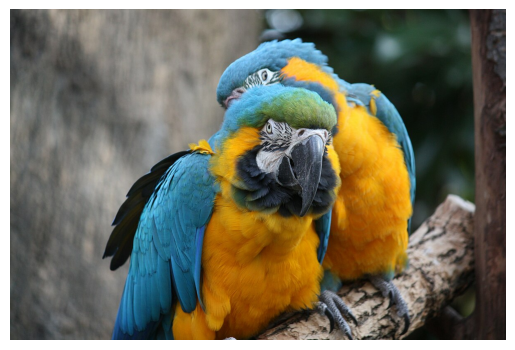

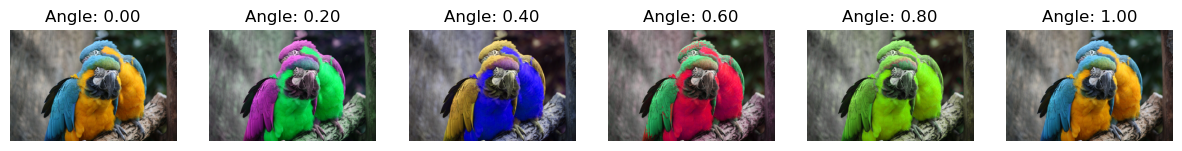

In [6]:
# Load the image
image_bgr = cv2.imread('BlueAndYellowMacaw_AraArarauna.jpg')

# Convert the image from BGR to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.show()


# Convert the image to HSV space
image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

def rotate_hue(image, angle):
    # Extract the hue channel
    hue = image[:, :, 0]
    
    # Apply the hue rotation
    rotated_hue = (hue + 255*angle) % 255
    
    # Replace the hue channel with the rotated hue
    image_rotated = np.copy(image)
    image_rotated[:, :, 0] = rotated_hue
    
    return image_rotated

# List of angles for rotation
angles = [k / 5 for k in range(6)]

# Apply rotation and visualize the images
plt.figure(figsize=(15, 5))
for i, angle in enumerate(angles):
    # Rotate the hue channel
    rotated_image_hsv = rotate_hue(image_hsv, angle)
    
    # Convert back to RGB space
    rotated_image_rgb = cv2.cvtColor(rotated_image_hsv, cv2.COLOR_HSV2RGB)
    
    # Plot the image
    plt.subplot(1, 6, i + 1)
    plt.imshow(rotated_image_rgb)
    plt.title(f'Angle: {angle:.2f}')
    plt.axis('off')

plt.show()

# Exercise 1.4

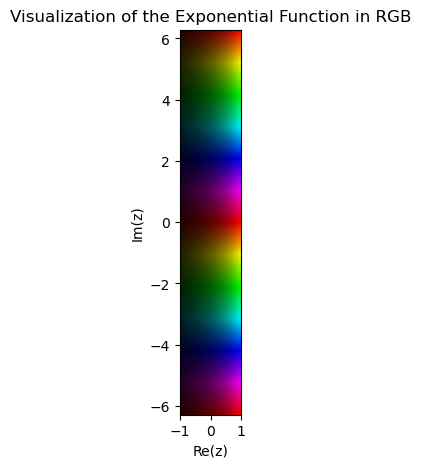

In [7]:
from skimage import color


x = np.linspace(-1, 1, 100)
y = np.linspace(-2 * np.pi, 2 * np.pi, 400)
X, Y = np.meshgrid(x, y)

Z = np.exp(X + 1j * Y)

R = np.abs(Z)
Theta = np.angle(Z)

hsv_image = np.zeros((Y.shape[0], X.shape[1], 3))

# hue depending on angle (make it positive to avoid defects)
hsv_image[..., 0] = (Theta + 2 * np.pi) / (2 * np.pi)

# full saturation
hsv_image[..., 1] = 1

# value ("colorful to black") depending on absolute value
hsv_image[..., 2] = R / R.max()

# convert from hsv to rgb format
rgb_image = color.hsv2rgb(hsv_image)

plt.figure(figsize=(10, 5))
plt.imshow(rgb_image, extent=[-1, 1, -2 * np.pi, 2 * np.pi])
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.title('Visualization of the Exponential Function in RGB')
plt.show()